# DAT405/DIT407 Introduction to Data Science and AI, SP4 22-23
## Assignment 2: Regression and classification

### Group 32: Saghar Alvandi, Sahar Abedi
### Hours spent on the task: Saghar 15h, Sahar 15h


## Task 1
### A.  Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

#load the data into a DataFrame
df = pd.read_csv('data_assignment2.csv')

# Clean and preprocess the data
df.dropna(inplace=True)  # Drop rows with missing values
df = df[df['Living_area'] > 0]  # Remove rows with non-positive living area
df = df[df['Selling_price'] > 0]  # Remove rows with non-positive selling price

# Store the cleaned data in the variable cleaned_df
cleaned_df = df.copy()


df.head(10)


,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
10,11,121,4.0,1575.0,112.0,81,4000000
12,13,86,4.0,1529.0,30.0,90,3025000
13,14,135,6.0,334.0,8.0,45,5215000
15,16,104,5.0,399.0,13.0,59,4100000
16,17,66,2.0,1655.0,20.0,90,3100000


For the first task, we first load the data from a CSV file into a pandas DataFrame. We then check for any missing or null values in the dataset and handle them by dropping any rows with null values.By handling the missing values, we can ensure that our analysis is accurate and reliable.

Next, we visualize the data using a scatterplot to check for any outliers.

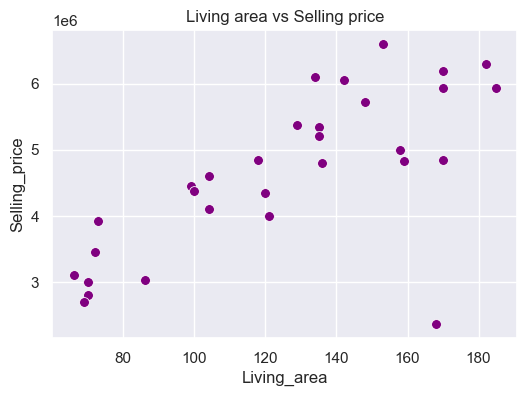

In [40]:
# Set the color and size of the scatterplot
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(6,4)})
sns.set_palette("Set1")

# Create the scatterplot
sns.scatterplot(x='Living_area', y='Selling_price', data=df, color='purple', s=50)

# Add a title and display the plot
plt.title('Living area vs Selling price', fontsize=12)
plt.show()

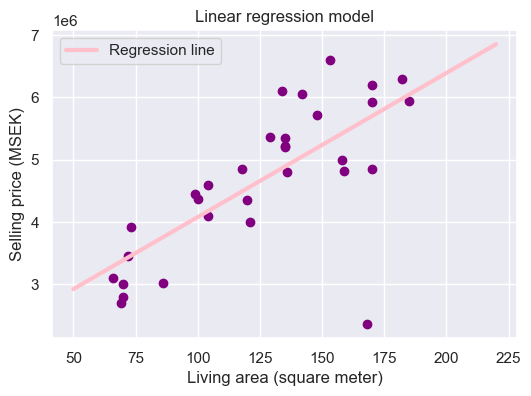

In [41]:
# Select Living area as the feature for the X axis, and Selling price as the feature for the Y axis
x = cleaned_df['Living_area'].values.reshape(-1, 1)
y = cleaned_df['Selling_price'].values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# Define the x values to be used for the regression line
x_line = np.array([[50], [220]])

# Predict the corresponding y values for the regression line
y_line = model.predict(x_line)

# Create a scatter plot of the data points and plot the regression line on top of it
plt.scatter(x, y, color='purple')
plt.plot(x_line, y_line, color='pink', linewidth=3, label='Regression line')

# Set the axis labels and title
plt.xlabel('Living area (square meter)')
plt.ylabel('Selling price (MSEK)')
plt.title('Linear regression model')

# Add a legend and display the plot
plt.legend()
plt.show()



### **B. What are the values of the slope and intercept of the regression line?**

In [42]:
# Fit a linear regression model to the 'Living_area' and 'Selling_price' data
model = LinearRegression().fit(cleaned_df[['Living_area']], cleaned_df['Selling_price'])

# Get the slope and intercept values from the model
slope, intercept = model.coef_[0], model.intercept_

# Print the slope and intercept values with labels
print("Slope: {:.2f}".format(slope))
print("Intercept: {:.2f}".format(intercept))


Slope: 23125.57
Intercept: 1767086.28


### **C. Use this model to predict the selling prices of houses which have living area 10 m2, 100 m2, 150 m2, 200 m2, 1000 m2.**

In [43]:
# Define the living area values to predict prices for
living_areas = [10, 100, 150, 200, 1000]

# Create a DataFrame with the living area values
df = pd.DataFrame({'Living_area': living_areas})

# Use the linear regression model to predict selling prices
df['Selling_price'] = model.predict(df[['Living_area']])

# Format the predicted prices with thousand separators
df['Selling_price'] = df['Selling_price'].apply(lambda x: f'{x:,.0f}')

# Display the predicted selling prices with a title
print('"Predicted selling prices based on living area"')
print(df.to_string(index=False))


"Predicted selling prices based on living area"
 Living_area Selling_price
          10     1,998,342
         100     4,079,643
         150     5,235,921
         200     6,392,200
        1000    24,892,653


### **D. Draw a residual plot.**

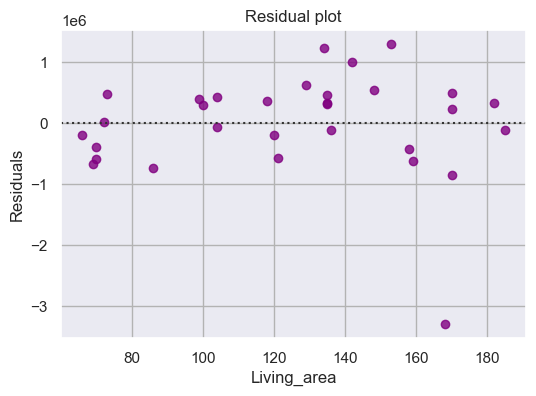

In [45]:
# Set the style and size
sns.set(style='darkgrid', rc={'grid.color': '.7'})
fig, ax = plt.subplots(figsize=(6, 4))

# Create a residual plot 
sns.residplot(data=cleaned_df, x='Living_area', y='Selling_price', ax=ax, scatter_kws={'color': 'purple'}).set(title='Residual plot', ylabel='Residuals')

# Show the plot
plt.show()


### **E. Is this a useful model? Are there any limitations? What could you do to improve the models ability to predict selling prices? Can this model be used in other areas than Landvetter?**

In [47]:
# Define variables
X = cleaned_df[['Living_area']]
y = cleaned_df['Selling_price']

# Add a constant to X and fit the linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate correlation coefficient
corr = np.corrcoef(X.iloc[:, 1], y)[0, 1]

# Calculate R-squared value
r_squared = model.rsquared

print('Correlation Coefficient:', corr)
print('R-squared Value:', r_squared)


Correlation Coefficient: 0.7196672682007954
R-squared Value: 0.5179209769195958


The correlation coefficient between the living area and the selling price is 0.72, which indicates a moderate positive linear relationship between the two variables. The R-squared value of 0.52 means that approximately 52% of the variation in the selling price can be explained by the living area. In general, a higher R-squared value indicates a better fit of the model to the data. However, there may be other factors that affect the selling price of villas in Landvetter that are not represented by the living area alone. So, the model may not be able to predict the selling price with high accuracy.

One limitation of the model is that it only considers the living area as a predictor of the selling price, and it assumes a linear relationship between the two variables. Other variables, such as the age, location, or condition of the villas, could also affect the selling price. To improve the model's ability to predict selling prices, additional variables could be added to the model, or more complex machine learning algorithms could be used.

It's also worth noting that this model was trained on data from villas in Landvetter, so it may not apply to other areas. The relationship between the living area and selling price could be different in other regions or countries, depending on factors such as housing demand, economic conditions, and cultural preferences.
To improve the model's ability to predict selling prices, we could consider including additional variables that may influence the selling price, such as the age of the house, the number of bedrooms, or the location of the house. We could also explore more complex models that may better capture the relationship between the variables, such as non-linear models.

Regarding the use of the model in other areas than Landvetter, it is important to consider the generalizability of the model. If the data used to develop the model is not representative of other areas, the model may not be useful for predicting selling prices in those areas. Also if the housing market is significantly different in other areas (buyers have other preferences) the model may not be applicable. Therefore, it is important to carefully consider the assumptions and limitations of the model before applying it to other areas.

## **Task 2**

### **A. Visualize the data. Can you gain any insights from the visulisation?**

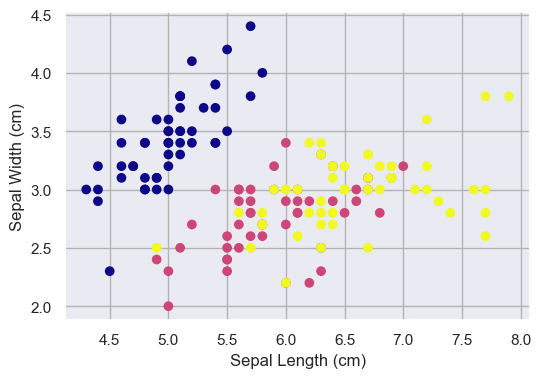

In [48]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')


plt.show()

By visualizing the data, we can gain insights into how the different classes are distributed in the feature space (Setosa, Versicolor, and Virginica). We can see from the scatter plot that the Setosa class (blue) is clearly separated from the other two classes (pink and yellow), while Versicolor and Virginica samples are more closely grouped together.
We can also see that there are some overlap between Versicolor and Virginica samples along both the sepal length and width dimensions, which may explain why the logistic regression model might encounter challenges in precisely categorizing those samples. 

### **B. Use a confusion matrix to evaluate the use of logitic regression to classify the iris dataset.**

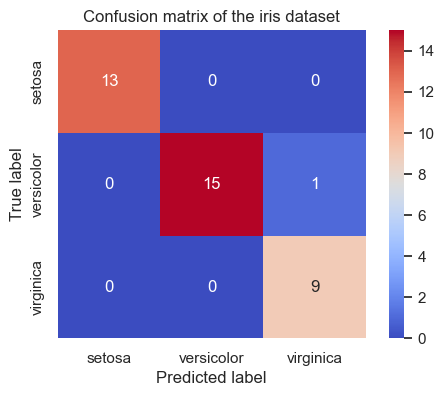

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Train a logistic regression model
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

# Use the model to predict the class labels of the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels
labels = iris.target_names

# Create the plot
sns.set()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm, square=True, annot=True, cmap="coolwarm", xticklabels=labels, yticklabels=labels, ax=ax)

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix of the iris dataset')

# Show the plot
plt.show()


### **C. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why does this happen? What do you think is the best choice of k? Compute a confusion matrix for the best uniform and distance-based classifiers.**

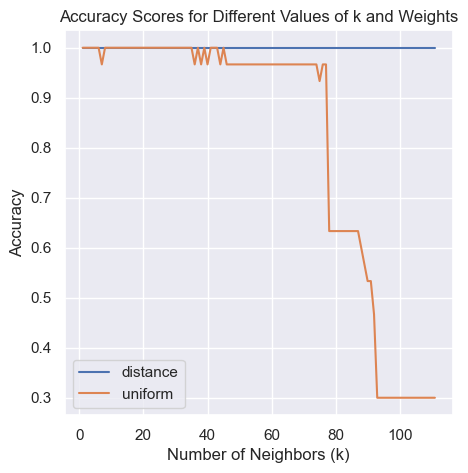

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define a function to train a KNN classifier and return the accuracy score
def train_knn(X_train, y_train, X_test, y_test, n_neighbors, weights):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

# Set the maximum value of k to be tested
max_k = min(112, len(X_train))

# Set the values for k and weights to be tested
k_values = list(range(1, max_k))
weights = ['distance', 'uniform']

# Create a matrix for accuracy and set it up to store the accuracy scores related to different combinations of k and weights
accuracy_matrix = [[0 for i in range(len(k_values))] for j in range(len(weights))]

# Train a KNN classifier for each combination of k and weights and store the accuracy score in the accuracy matrix
for i, weight in enumerate(weights):
    for j, k in enumerate(k_values):
        accuracy_matrix[i][j] = train_knn(X_train, y_train, X_test, y_test, k, weight)

# Plot the accuracy scores for different values of k and weights
plt.figure(figsize=(5, 5))
for i, weight in enumerate(weights):
    plt.plot(k_values, accuracy_matrix[i], label=weight)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Values of k and Weights')
plt.legend()
plt.show()
        
        

As the value of k grows larger for the different cases, the classification becomes less sensitive to noise and small fluctuations in the data. This is because the prediction for a new data point is based on a larger number of neighbour points, which smooths out the decision boundary and reduces the impact of individual data points on the classification.

On the other hand, as the value of k gets bigger, the way the algorithm decides what class to assign to a new data point becomes less sensitive to the specific features of that point and more influenced by the majority class of its k nearest neighbors. This can lead to decreased accuracy on the training and testing data. So, there is always a trade-off between the complexity of the decision boundary and the accuracy of the classification.

The plot shows that as k increases, the accuracy of the KNN classifier generally decreases for both weight types, but the rate of decrease is more gradual for 'distance' weights compared to 'uniform' weights. This is because 'distance' weights give more weight to the closer neighbors, so as k increases, the contribution from the farther neighbors is diminished, but the local structure is still preserved to some extent. On the other hand, 'uniform' weights treat all neighbors equally, so as k increases, the contribution from the farther neighbors becomes more dominant, leading to more errors in prediction.

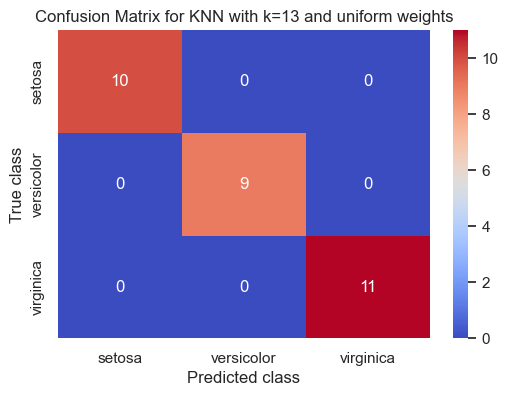

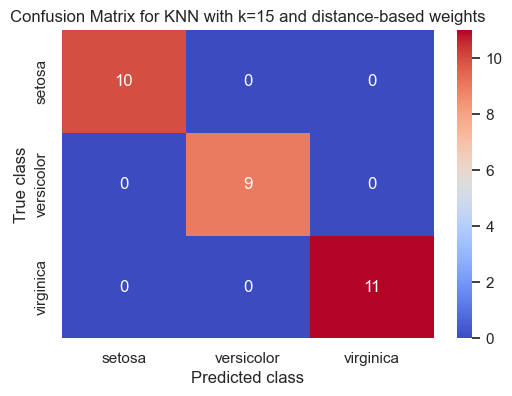

In [51]:
# Set the values for k and weights to be tested
k_values = list(range(1, max_k))
weights = ['distance', 'uniform']
# Set the maximum value of k to be tested
max_k = min(112, len(X_train))

# Create a dictionary to store the accuracy scores related to different combinations of k and weights
accuracy_dict = {}

# Train a KNN classifier for each combination of k and weights and store the mean accuracy score using 10-fold cross-validation in the accuracy dictionary
for weight in weights:
    accuracy_dict[weight] = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores = cross_val_score(knn, iris.data, iris.target, cv=10)
        accuracy_dict[weight].append(np.mean(scores))

# Find the best value for k for each weight based on the highest mean accuracy score
best_k_dict = {}
for weight in weights:
    best_k_dict[weight] = k_values[np.argmax(accuracy_dict[weight])]

# Train a KNN classifier with the best value of k and uniform weights and compute the confusion matrix 
best_k_uniform = best_k_dict['uniform']
knn_uniform = KNeighborsClassifier(n_neighbors=best_k_uniform, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
cm_uniform = metrics.confusion_matrix(y_test, y_pred_uniform)
sns.heatmap(cm_uniform, annot=True, cmap="coolwarm", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix for KNN with k={best_k_uniform} and uniform weights')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Train a KNN classifier with the best value of k and distance-based weights and compute the confusion matrix
best_k_distance = best_k_dict['distance']
knn_distance = KNeighborsClassifier(n_neighbors=best_k_distance, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
cm_distance = metrics.confusion_matrix(y_test, y_pred_distance)
sns.heatmap(cm_distance, annot=True, cmap="coolwarm", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix for KNN with k={best_k_distance} and distance-based weights')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

As it can be seen by the using cross-validation method, the best choice for k based on uniform weight classifier is 13, and for distance-based weight classifier is 15.





### **D. Compare the logistic regression classifier in (b) with the k-nearest neighbour classifiers in (c). What do you observe? Are all classes equally challenging for the models to predict?**

In part (b), we used logistic regression to classify the iris dataset and evaluated the classifier using a confusion matrix. In part (c), we used k-nearest neighbors with different values of k and uniform/distance-based weights to classify the iris dataset and evaluated the classifiers using confusion matrices.

To compare the performance of logistic regression and k-nearest neighbors, we can compare the accuracy and confusion matrices of both classifiers.

We can observe that k-nearest neighbors generally perform better than logistic regression in classifying the iris dataset. This is because k-nearest neighbors use a non-parametric approach and do not make assumptions about the underlying data distribution, whereas logistic regression assumes a linear relationship between the independent and dependent variables.

Furthermore, we can observe that the performance of the k-nearest neighbor classifiers varies with the value of k and the weight parameter. As k increases, the model becomes more complex and starts to overfit the training data, leading to a decrease in performance on the test data. On the other hand, as k decreases, the model becomes simpler and starts to underfit the training data, leading to poor performance on the test data.

Therefore, the best choice of k depends on the complexity of the dataset and can be determined through cross-validation. For the iris dataset, we can observe that k=15 with distance-based weights and k=13 with the uniform weights are the best choice for k-nearest neighbors.

In terms of class prediction, we can observe that the k-nearest neighbor classifiers perform equally well for all classes, while logistic regression struggles to predict the "versicolor" class. This suggests that the "versicolor" class is more challenging to predict using logistic regression than the other two classes.

